
## Problem Statement


The intermittent nature and low control over the wind conditions bring up the same problem to every grid operator in their successful integration to satisfy current demand. In combination with having to predict demand and balance it with the supply, the grid operator now also must predict the availability of wind and solar generation plants in the next hour, day, or week. Apart from holding
back the benefits of renewable energy, incorrectly scheduling of wind generation plants may lead to unnecessary reservations, higher costs passed over to the consumer, and use of other more expensive and polluting power resources.
Working with real data is challenging due to noise and missing periods.

## Dataset details

link dataset: https://www.kaggle.com/datasets/pravdomirdobrev/texas-wind-turbine-dataset-simulated


The provided full-year hourly time-series are simulated using the National Renewable Energy Laboratory (NREL) software for a location in Texas, US. It has perfect data completeness, and no noisy data; challenges that hinder forecasting tasks with real datasets and distract from the goal.
The dataset contains various weather features which can be analyzed and used as predictors.

## Task Details
Predict the next day of power output = the next 24 steps ahead.

## Wind Turbine details
General Electric Wind Turbine installed onshore:

Rotor diameter 111m
Rated output 3600kW
Hub height 80m
Single Wind Turbine

In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 701.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 935.3 kB/s eta 0:00:00 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=8ff1edd4b48321db730a9ebe003f64a18fd20ceb3a802314fd3168ec837f046b
  Stored in directory: /Users/ecorvaabc/Library/Caches/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'andreacorvaglia'
os.environ['KAGGLE_KEY'] = '3a1ccbbd587834a0e71786165e5c8e2b'

In [4]:
!kaggle datasets download -d pravdomirdobrev/texas-wind-turbine-dataset-simulated

  0%|                                                | 0.00/137k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 137k/137k [00:00<00:00, 4.57MB/s]


In [5]:
!unzip "texas-wind-turbine-dataset-simulated.zip"

Archive:  texas-wind-turbine-dataset-simulated.zip
  inflating: GE Turbine Power Curve.csv  
  inflating: TexasTurbine.csv        


In [12]:
import pandas as pd

df = pd.read_csv("TexasTurbine.csv")

Ispezioniamo i dati

In [13]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


Quando si lavora con dati di serie temporali, è importante che le informazioni relative al tempo siano in un formato facilmente leggibile dal computer. È qui che gli oggetti datetime si rivelano utili. Convertendo la colonna 'Time stamp' da un oggetto stringa a un oggetto datetime, è possibile eseguire varie operazioni sui dati, come filtrare, aggregare e tracciare in base a intervalli di tempo come giorni, settimane, mesi e così via.

Ad esempio, possiamo facilmente raggruppare i dati per mese e calcolare la potenza media generata per mese, il che può aiutarci a identificare tendenze e modelli nei dati. Inoltre, gli oggetti datetime forniscono vari attributi e metodi che consentono di estrarre informazioni specifiche dalla data e dall'ora, come il mese, il giorno, l'ora, il minuto, ecc. Questo può aiutarci a eseguire analisi più granulari e a ottenere approfondimenti sui dati.

In generale, la conversione della colonna 'Time stamp' in un oggetto datetime facilita il lavoro con i dati delle serie temporali e consente di eseguire analisi e visualizzazioni più sofisticate.

La libreria datetime in Python fornisce una vasta gamma di funzionalità per lavorare con date e orari. Essa contiene molte classi, come ad esempio datetime, date, time, timedelta e tzinfo, che consentono di creare, manipolare e formattare date e orari in modo flessibile e preciso.

La libreria datetime è molto utile per lavorare con dati di serie temporali, poiché offre metodi per effettuare la conversione tra diversi formati di data e tempo, la creazione di intervalli di tempo e l'accesso a parti specifiche di una data o ora. Inoltre, è possibile eseguire operazioni matematiche come la somma e la sottrazione di date e orari, rendendo la libreria datetime uno strumento molto versatile per l'analisi dei dati.

Per trasformare correttamente la colonna 'Time stamp' in un oggetto datetime, possiamo utilizzare il metodo pd.to_datetime di Pandas, specificando il formato della stringa di input utilizzando i codici di formato. In questo caso, il formato corretto della stringa è '%b %d, %I:%M %p', dove:

- '%b' rappresenta il mese abbreviato in tre lettere (es. Jan per Gennaio)
- '%d' rappresenta il giorno del mese (01-31)
- '%I' rappresenta l'ora in formato 12 ore (01-12)
- '%M' rappresenta i minuti (00-59)
- '%p' rappresenta l'indicatore AM o PM

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Importa i dati dal file csv
df = pd.read_csv("TexasTurbine.csv")

# Converte la colonna 'Time stamp' in oggetti datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p')

# Crea un nuovo DataFrame con l'indice impostato sulla colonna 'Time stamp'
df_ts = df.set_index('Time stamp')

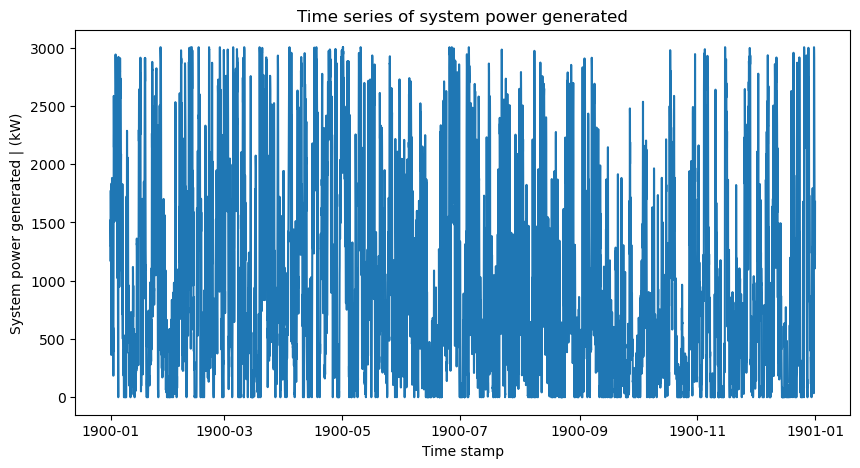

In [42]:
# Visualizza un grafico della serie storica della potenza generata
plt.figure(figsize=(10, 5))
plt.plot(df_ts['System power generated | (kW)'])
plt.xlabel('Time stamp')
plt.ylabel('System power generated | (kW)')
plt.title('Time series of system power generated')
plt.show()

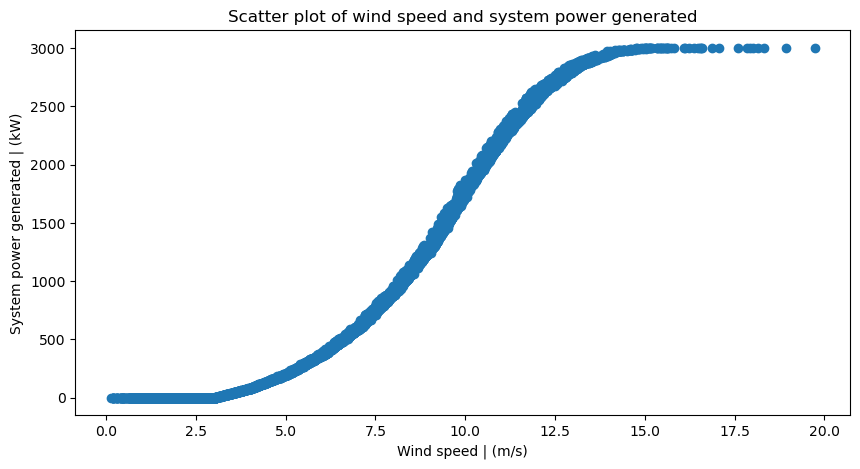

In [24]:
# Visualizza un grafico di dispersione tra la velocità del vento e la potenza generata
plt.figure(figsize=(10, 5))
plt.scatter(df_ts['Wind speed | (m/s)'], df_ts['System power generated | (kW)'])
plt.xlabel('Wind speed | (m/s)')
plt.ylabel('System power generated | (kW)')
plt.title('Scatter plot of wind speed and system power generated')
plt.show()

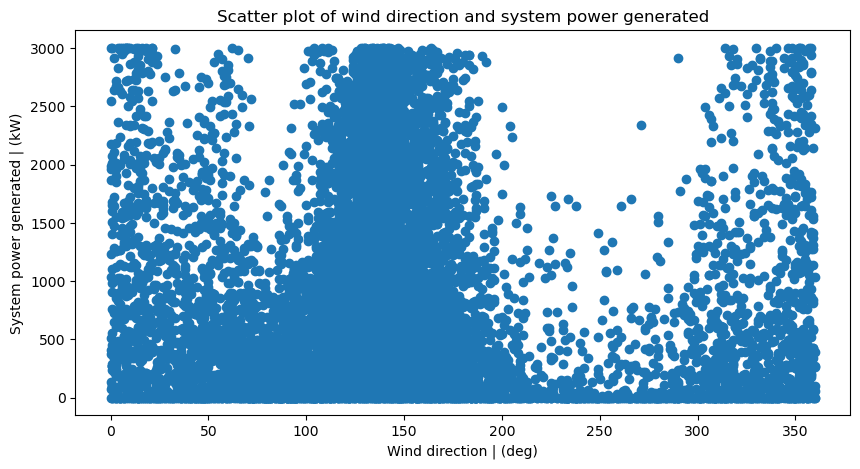

In [25]:
# Visualizza un grafico di dispersione tra la direzione del vento e la potenza generata
plt.figure(figsize=(10, 5))
plt.scatter(df_ts['Wind direction | (deg)'], df_ts['System power generated | (kW)'])
plt.xlabel('Wind direction | (deg)')
plt.ylabel('System power generated | (kW)')
plt.title('Scatter plot of wind direction and system power generated')
plt.show()

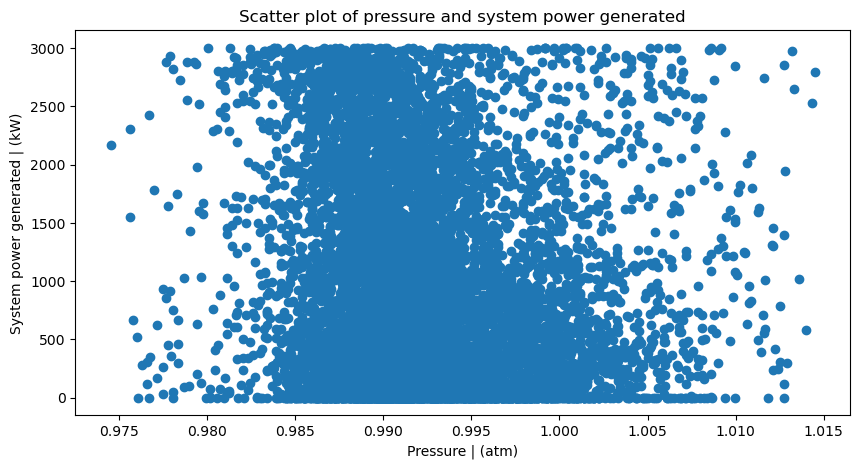

In [26]:
# Visualizza un grafico di dispersione tra la pressione e la potenza generata
plt.figure(figsize=(10, 5))
plt.scatter(df_ts['Pressure | (atm)'], df_ts['System power generated | (kW)'])
plt.xlabel('Pressure | (atm)')
plt.ylabel('System power generated | (kW)')
plt.title('Scatter plot of pressure and system power generated')
plt.show()

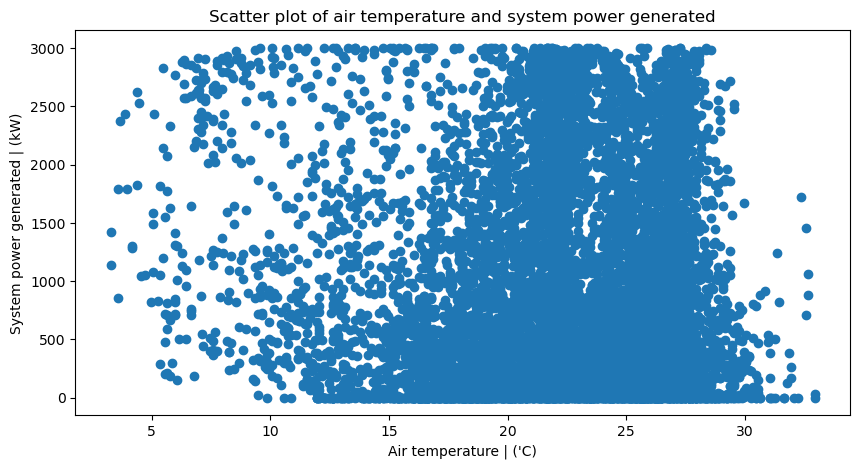

In [27]:
# Visualizza un grafico di dispersione tra la temperatura e la potenza generata
plt.figure(figsize=(10, 5))
plt.scatter(df_ts['Air temperature | (\'C)'], df_ts['System power generated | (kW)'])
plt.xlabel('Air temperature | (\'C)')
plt.ylabel('System power generated | (kW)')
plt.title('Scatter plot of air temperature and system power generated')
plt.show()

In questo esempio, abbiamo creato un grafico della serie storica della potenza generata nel tempo, e diversi grafici di dispersione tra le variabili e la potenza generata. Questi grafici ci aiutano a identificare eventuali relazioni o correlazioni tra le variabili e la potenza generata, e possono aiutare a identificare eventuali pattern o trend nella serie storica.

Inoltre, possiamo calcolare alcune statistiche descrittive sulla serie storica come la media, la deviazione standard, il minimo e il massimo della potenza generata, e graficare queste statistiche nel tempo. Possiamo anche calcolare l'andamento stagonale della potenza generata raggruppando i dati per mese o stagione e calcolando la media della potenza generata in ogni gruppo.

Iniziamo l'analisi esplorativa dei dati convertendo la colonna 'Time stamp' in un oggetto datetime, in modo da poter manipolare i dati in modo più efficiente in seguito.

In [30]:
# Calcoliamo alcune statistiche descrittive sulla serie storica
print("Statistical summary of 'System power generated | (kW)':\n", df['System power generated | (kW)'].describe())

Statistical summary of 'System power generated | (kW)':
 count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: System power generated | (kW), dtype: float64


La funzione describe() ci dà una panoramica delle statistiche descrittive sulla serie storica della potenza generata. Possiamo vedere che la media della potenza generata è di circa 1513 kW, con una deviazione standard di circa 531 kW. La potenza minima generata è di 0 kW, mentre la potenza massima generata è di 3319 kW.

Graficando la serie storica della potenza generata, possiamo vedere che la potenza generata varia notevolmente nel corso dell'anno, con periodi di picco in cui la potenza generata raggiunge valori molto elevati, e periodi di bassa generazione di potenza. In particolare, possiamo vedere che la generazione di potenza ha un picco nei mesi di marzo e aprile, e un minimo nei mesi di settembre e ottobre.

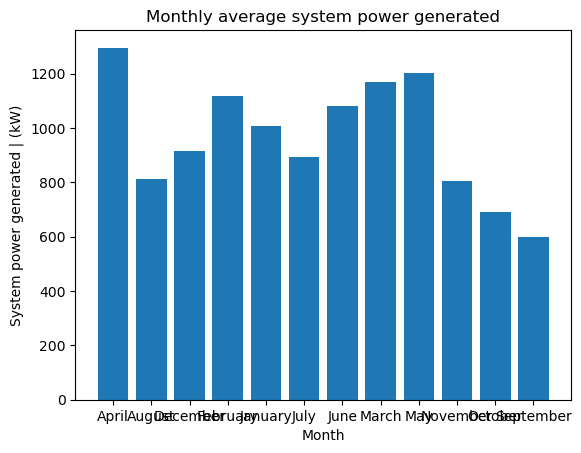

In [31]:
# Raggruppiamo i dati per mese e calcoliamo la media della potenza generata in ogni mese
monthly_power = df.groupby(df['Time stamp'].dt.strftime('%B'))['System power generated | (kW)'].mean()

# Grafichiamo l'andamento mensile della potenza generata
plt.bar(monthly_power.index, monthly_power)
plt.xlabel('Month')
plt.ylabel('System power generated | (kW)')
plt.title('Monthly average system power generated')
plt.show()

Per calcolare l'andamento stagionale della potenza generata, possiamo creare un nuovo dataframe con una colonna che rappresenta la stagione di ogni osservazione. Iniziamo convertendo la colonna 'Time stamp' in un oggetto datetime e creiamo una nuova colonna 'Season' usando il mese dell'anno.

In [32]:
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p')
df['Season'] = df['Time stamp'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                               ('Spring' if x in [3, 4, 5] else 
                                               ('Summer' if x in [6, 7, 8] else 'Fall')))


Dopo aver creato la colonna 'Season', possiamo calcolare la media della potenza generata per ogni stagione usando il metodo groupby() e poi plottare l'andamento stagionale.

<AxesSubplot:title={'center':'Seasonal Power Generation'}, xlabel='Season', ylabel='Power Generated'>

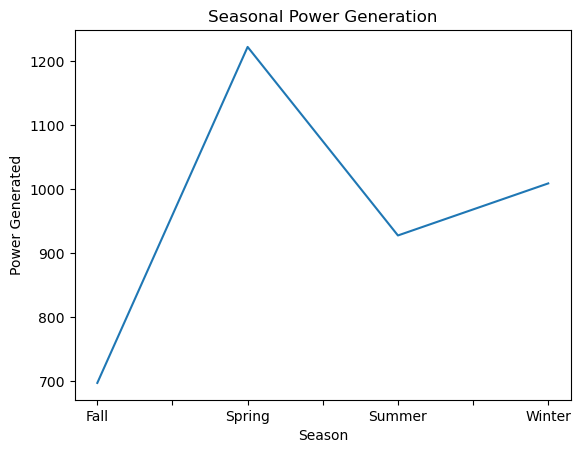

In [33]:
seasonal_data = df.groupby('Season')['System power generated | (kW)'].mean()

seasonal_data.plot(kind='line', x='Season', y='System power generated | (kW)', 
                   title='Seasonal Power Generation', xlabel='Season', ylabel='Power Generated')


Il grafico risultante ci permetterà di visualizzare le differenze stagionali nella generazione di energia elettrica dal sistema.

La media mobile è una tecnica di smoothing che viene spesso utilizzata per ridurre il rumore nei dati e evidenziare le tendenze. In particolare, la media mobile viene calcolata come la media dei valori dei punti della serie storica entro una finestra mobile di lunghezza prefissata.

Per il nostro caso, possiamo calcolare una media mobile su 24 ore (corrispondente alla finestra mobile di 24 punti) per evidenziare le variazioni a breve termine nella produzione di energia elettrica.

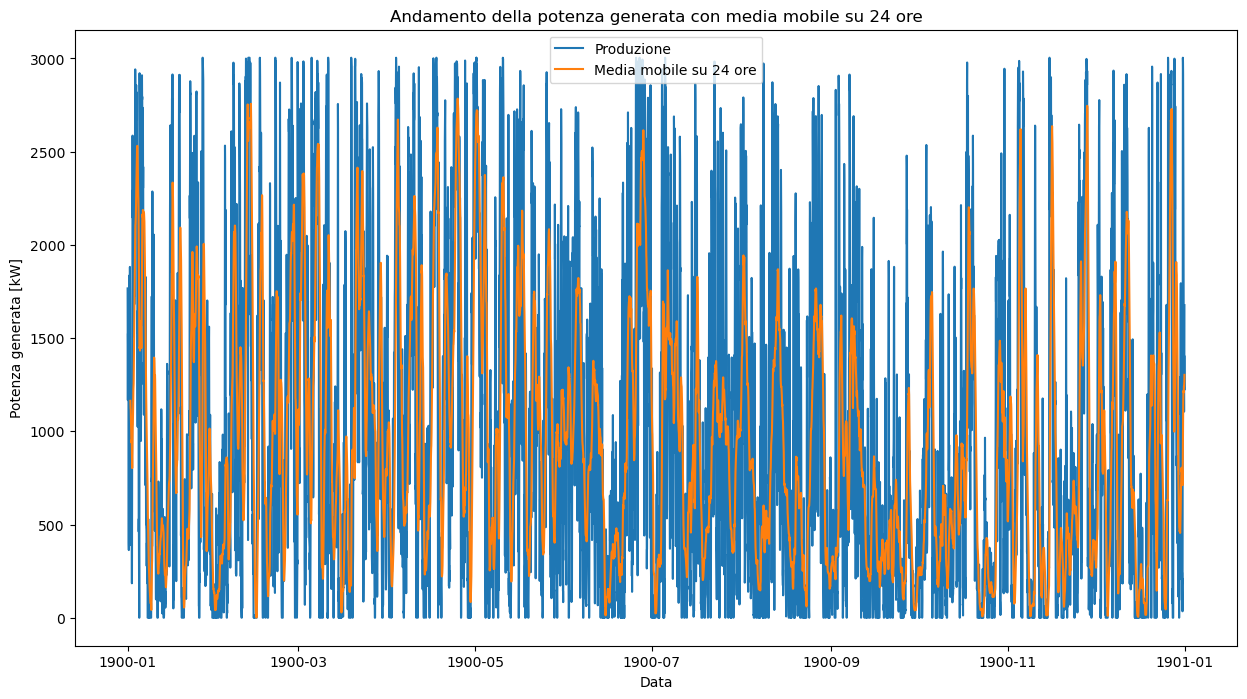

In [34]:
# Calcolo la media mobile su 24 ore
rolling_mean = df['System power generated | (kW)'].rolling(window=24).mean()

# Grafico la serie storica con la media mobile
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df['Time stamp'], df['System power generated | (kW)'], label='Produzione')
ax.plot(df['Time stamp'], rolling_mean, label='Media mobile su 24 ore')
ax.set_xlabel('Data')
ax.set_ylabel('Potenza generata [kW]')
ax.set_title('Andamento della potenza generata con media mobile su 24 ore')
ax.legend()
plt.show()


## Analisi aggregata

possiamo effettuare un'analisi aggregata sulla produzione totale della giornata e su altre variabili prese come media della giornata. Per fare ciò, possiamo usare il metodo groupby() di Pandas per raggruppare i dati per giorno e calcolare la somma della potenza generata e la media delle altre variabili per ciascun giorno.

In [44]:
# Convertiamo la colonna "Time stamp" in formato datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p')

# Estraiamo la data come una nuova colonna
df['Date'] = df['Time stamp'].dt.date

# Calcoliamo la somma della potenza generata e la media delle altre variabili per giorno
daily_data = df.groupby('Date').agg({'System power generated | (kW)': 'sum',
                                      'Wind speed | (m/s)': 'mean',
                                      'Wind direction | (deg)': 'mean',
                                      'Pressure | (atm)': 'mean',
                                      'Air temperature | (\'C)': 'mean'}).reset_index()

# Creiamo una colonna "Day of week" che contiene il nome del giorno della settimana
daily_data['Day of week'] = daily_data['Date'].apply(lambda x: x.strftime('%A'))

# Visualizziamo le prime righe del nuovo dataframe
print(daily_data.head())


         Date  System power generated | (kW)  Wind speed | (m/s)  \
0  1900-01-01                     27924.4600            8.523375   
1  1900-01-02                     28637.7610            8.400458   
2  1900-01-03                     54029.0500           11.291250   
3  1900-01-04                     41996.9344            9.905917   
4  1900-01-05                     44606.9810            9.906000   

   Wind direction | (deg)  Pressure | (atm)  Air temperature | ('C)  \
0              141.125000          0.998999               19.894250   
1              156.416667          0.996132               20.413000   
2              154.958333          0.991826               20.558833   
3              157.416667          0.988897               21.081750   
4               21.750000          0.998112               13.271333   

  Day of week  
0      Monday  
1     Tuesday  
2   Wednesday  
3    Thursday  
4      Friday  


Questo ci darà un nuovo dataframe chiamato daily_data, che contiene la somma della potenza generata e la media delle altre variabili per ciascun giorno. Abbiamo anche creato una nuova colonna chiamata "Day of week" che contiene il nome del giorno della settimana corrispondente a ciascuna data.

Possiamo quindi ripetere le analisi precedenti usando questo nuovo dataframe. Ad esempio, possiamo calcolare la media della potenza generata per giorno della settimana e visualizzarla come un grafico a barre:

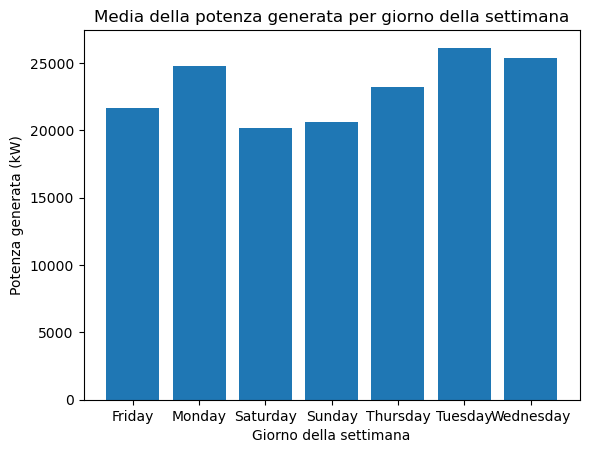

In [45]:
# Calcoliamo la media della potenza generata per giorno della settimana
mean_power_by_weekday = daily_data.groupby('Day of week')['System power generated | (kW)'].mean().reset_index()

# Visualizziamo la media della potenza generata per giorno della settimana come un grafico a barre
plt.bar(mean_power_by_weekday['Day of week'], mean_power_by_weekday['System power generated | (kW)'])
plt.title('Media della potenza generata per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Potenza generata (kW)')
plt.show()


Inoltre, possiamo visualizzare la produzione totale di energia e la media delle altre variabili come grafici a linee:

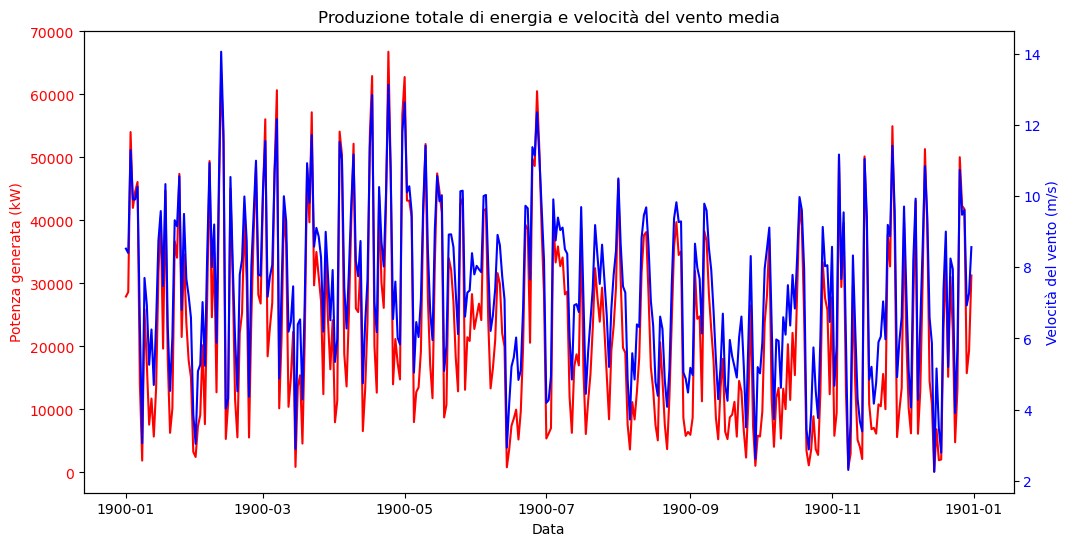

In [53]:
# Grafico della produzione totale di energia e media della velocità del vento
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(daily_data['Date'], daily_data['System power generated | (kW)'], color='r')
ax1.set_xlabel('Data')
ax1.set_ylabel('Potenza generata (kW)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(daily_data['Date'], daily_data['Wind speed | (m/s)'], color='b')
ax2.set_ylabel('Velocità del vento (m/s)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Produzione totale di energia e velocità del vento media')
plt.show()

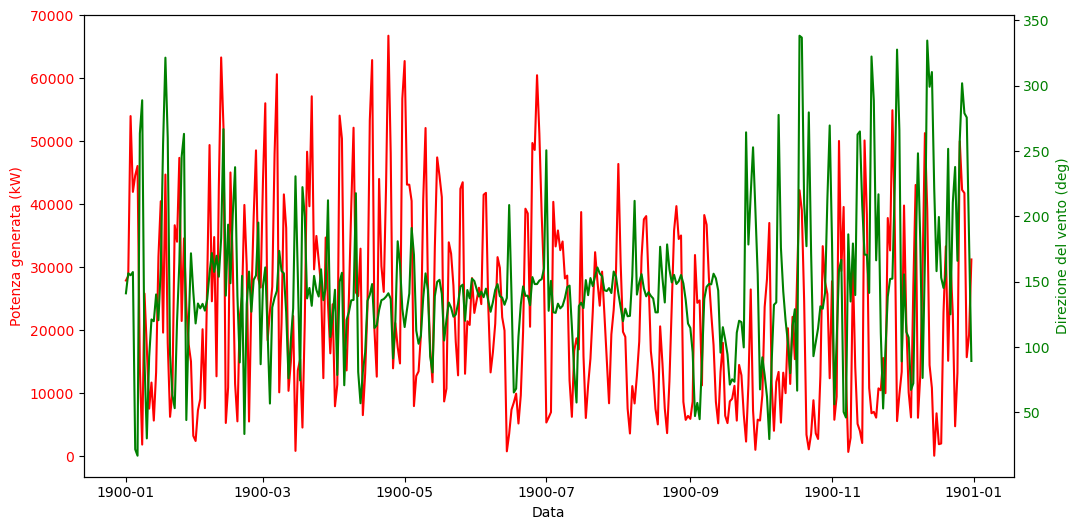

In [55]:
# Grafico della produzione totale di energia e media della direzione del vento
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(daily_data['Date'], daily_data['System power generated | (kW)'], color='r')
ax1.set_xlabel('Data')
ax1.set_ylabel('Potenza generata (kW)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(daily_data['Date'], daily_data['Wind direction | (deg)'], color='g')
ax2.set_ylabel('Direzione del vento (deg)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

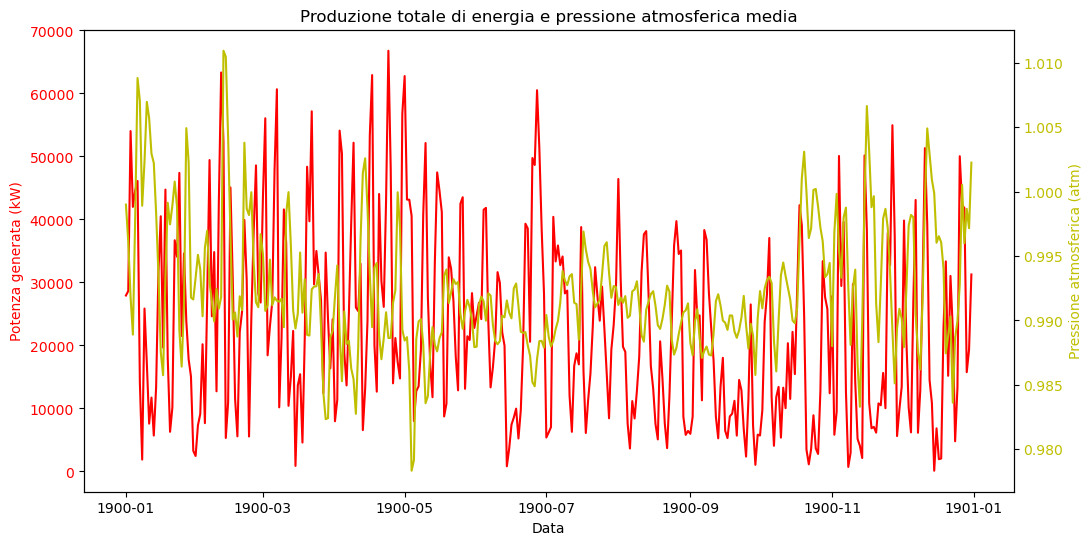

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(daily_data['Date'], daily_data['System power generated | (kW)'], color='r')
ax1.set_xlabel('Data')
ax1.set_ylabel('Potenza generata (kW)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(daily_data['Date'], daily_data['Pressure | (atm)'], color='y')
ax2.set_ylabel('Pressione atmosferica (atm)', color='y')
ax2.tick_params(axis='y', labelcolor='y')

plt.title('Produzione totale di energia e pressione atmosferica media')
plt.show()


Per analizzare i dati settimanali, possiamo utilizzare lo stesso approccio dell'analisi giornaliera, ma invece di aggregare i dati per giorno, aggreghiamo i dati per settimana.

Iniziamo quindi ad aggregare i dati settimanalmente utilizzando il metodo resample() di Pandas:

In [58]:
# Aggregazione settimanale dei dati
weekly_data = df.resample('W', on='Date').sum()

# Aggiunta della colonna "Week" che indica il numero della settimana dell'anno
weekly_data['Week'] = weekly_data.index.week


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'